In [1]:
from sklearn import datasets
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv("C:\MyPython\csv\Sample01-k-means.csv")
#data = pd.read_csv("C:/MyPython/csv/Sample01-k-means.csv")
data.head(1)

,x,y
0,25,79


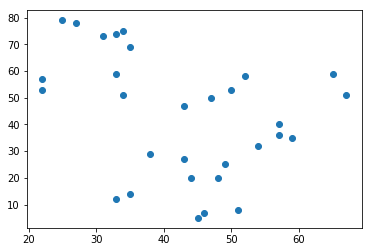

In [3]:
plt.scatter(data['x'], data['y'])
plt.show()

In [4]:
from sklearn.cluster import KMeans

In [7]:
https://datascienceschool.net/view-notebook/2205ad8f0c5947c08696e8927b466341/
    
K-Means 클러스터링 알고리즘은 가장 단순하고 빠른 클러스터링 알고리즘의 하나이다.
다음과 같은 목적함수 값이 최소화될 때까지 클러스터의 중심(centroid) 위치와
각 데이터가 소속될 클러스터를 반복해서 찾는다. 이 값을 inertia라고도 한다.

scikit-learn의 cluster 서브패키지는 KMeans 클러스터링을 위한 KMeans 클래스를 제공한다.
다음과 같은 인수를 받을 수 있다.

n_clusters: 클러스터의 갯수
init: 초기화 방법. "random"이면 무작위, "k-means++"이면 K-Means++ 방법. 또는 각 데이터의 클러스터 라벨.
n_init: 초기 중심값 시도 횟수. 디폴트는 10이고 10개의 무작위 중심값 목록 중 가장 좋은 값을 선택한다.
max_iter: 최대 반복 횟수.
random_state: 시드값.
    
k-means clustering
각 반복에서 로컬 최대 값을 찾는 것을 목표로 하는 반복 클러스터링 알고리즘. 초기에 원하는 클러스터 수가 정의됨
3개의 클래스가 있다는 것을 예상한다면 "n_cluster" 매개 변수로 kmeans 모델에 전달하여 데이터를 3개의 클래스로
그룹화함. 그러면 임의로 세 점 (입력)이 세 클러스터에 할당됨. 각 점들 사이의 중심 거리에 기초하여 클러스터로 분리됨


In [5]:
kmeans = KMeans(n_clusters=3).fit(data)      # clusters 분류를 3개로 한다.
centroids = kmeans.cluster_centers_

In [6]:
centroids    # cluster의 중심이 되는 좌표가 나온다.   위에서 3개로 지정했기 때문에 3개가 나온다.

array([[29.6, 66.8],
       [55.1, 46.1],
       [43.2, 16.7]])

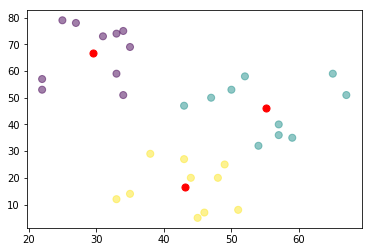

In [7]:
plt.scatter(data['x'], data['y'], c=kmeans.labels_.astype(float), s = 50, alpha = 0.5) 
# s 는 점의 크기, alpha 는 색 진하기
plt.scatter(centroids[:,0], centroids[:,1], c = 'red', s = 50)    # 빨간점은 중간
plt.show()

In [8]:
x = data['x']
y = data['y']
type(x), type(y) # (pandas.core.series.Series, pandas.core.series.Series)

(pandas.core.series.Series, pandas.core.series.Series)

In [12]:
# zip 함수는 보통 List여러개로 를 slice 할때 사용을 합니다.
# 보통 우리가 김밥을 말때, 여러가지 재료를 묶습니다.
# 그리고 김밥을 자르죠,, 이것과 개념이 비슷합니다.
# 여러가지 List를 김밥말듯이 말아버립니다.
# 그리고 iterator 등의 함수로 slice를 하는 것이죠,
# 김밥 슬라이스 자르듯이 자르게 됩니다.
# zip 함수는 보다보면 사용할때가 은근 많습니다.
# 여럿의 리스트를 짝지어주는 역할인거죠

x1 = x.values
y1 = y.values
checked = list(zip(x1, y1))
print(checked)
type(checked)    # list

data2 = np.array(checked).reshape(len(x1),2)
print(type(data2))   # <class 'numpy.ndarray'>
print(data2)
data3 = []
len(data2)   # 30

[(25, 79), (34, 51), (22, 53), (27, 78), (33, 59), (33, 74), (31, 73), (22, 57), (35, 69), (34, 75), (67, 51), (54, 32), (57, 40), (43, 47), (50, 53), (57, 36), (59, 35), (52, 58), (65, 59), (47, 50), (49, 25), (48, 20), (35, 14), (33, 12), (44, 20), (45, 5), (38, 29), (43, 27), (51, 8), (46, 7)]
<class 'numpy.ndarray'>
[[25 79]
 [34 51]
 [22 53]
 [27 78]
 [33 59]
 [33 74]
 [31 73]
 [22 57]
 [35 69]
 [34 75]
 [67 51]
 [54 32]
 [57 40]
 [43 47]
 [50 53]
 [57 36]
 [59 35]
 [52 58]
 [65 59]
 [47 50]
 [49 25]
 [48 20]
 [35 14]
 [33 12]
 [44 20]
 [45  5]
 [38 29]
 [43 27]
 [51  8]
 [46  7]]


30

In [13]:
from scipy.spatial.distance import cdist

# 몇 개로 분류해야 가장 적합한지 구하는 알고리즘

K = range(1,31)
for k in K:
    kmeanModel = KMeans(n_clusters = k).fit(data2)
    #print(kmeanModel)
    d = cdist(data2, kmeanModel.cluster_centers_, 'euclidean')
    d2 = sum(np.min(d, axis = 1)) / data2.shape[0]
    # d2의 의미는 k-평균 알고리즘(elbow)
    data3.append(d2)
    print(d2)
# 10.574911476191717

23.693201938148384
14.455398125748394
10.574911476191717
8.763082712451988
7.4850203876301915
6.060632821706659
5.120189656566015
4.261941024585835
3.7908030797645904
3.3167447871610625
2.953335451789376
2.674364068100758
2.3718325822731594
2.1307484347829617
1.9656102922693803
1.7225011269239399
1.5854318679852855
1.4149695522592496
1.1850250655614312
1.0055195719902812
0.8574307458659983
0.7160093896286885
0.5826760562953555
0.44934272296202216
0.3650281539872885
0.27074724982908216
0.19621165057908915
0.12167605132909616
0.047140452079103175
0.0


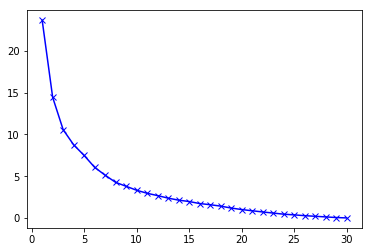

In [14]:
plt.plot(K, data3, 'bx-')
plt.show()

In [ ]:
#

from scipy.spatial.distance import cdist
def testFunc(x, y):
    x1 = x
    y1 = y
    data2 = np.array(list(zip(x1, y1))).reshape(len(x1),2)
    data3 = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(data2)
        kmeanModel.fit(data2)
        d = cdist(data2, kmeanModel.cluster_centers_, 'euclidean') #
        d2 = sum(np.min(d, axis=1)) / data2.shape[0] #
        data3.append(d2)
    
    return data3